# Visualicemos los datos a ver que tenemos

* Cargo librerias
* Cargo los nuevo csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
import warnings
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
warnings.filterwarnings("ignore")

In [2]:
dfcomplete = pd.read_csv("../data/datos completos.csv", sep = ';',index_col = 0)

In [3]:
dfcomplete.head()

,junio 2021,mayo 2021,abril 2021,marzo 2021,febrero 2021,enero 2021,diciembre 2020,noviembre 2020,octubre 2020,septiembre 2020,...,octubre 2011,septiembre 2011,agosto 2011,Salario media,Precio compra m2,Tasa Paro,Coste de vida,Precio medio Obra Nueva INE 2016,Precio Medio 2 mano INE 2016,VM
provincias,,,,,,,,,,,,,,,,,,,,,
Madrid,13.7,13.7,13.7,13.8,13.9,14.0,14.2,14.5,14.7,14.9,...,11.1,11.0,11.0,2408.23,2945.0,13.5,115.7,79097.0,64674.0,256030.20
Murcia,6.8,6.7,6.6,6.5,6.5,6.4,6.4,6.4,6.6,6.7,...,5.6,5.5,5.6,1995.72,1056.0,15.4,87.8,82108.0,6684.0,96970.65
Asturias,7.5,7.5,7.5,7.5,7.5,7.4,7.4,7.4,7.4,7.4,...,6.8,6.9,7.1,2341.76,1361.0,13.5,98.1,79552.0,63398.0,103938.28
Rioja,6.9,6.9,6.8,6.7,6.8,6.8,6.6,6.7,6.8,6.7,...,5.7,5.8,5.7,1987.39,1235.0,10.4,94.5,64394.0,56758.0,97816.94
Cantabria,8.3,8.1,8.1,8.0,8.0,7.9,7.9,7.8,7.9,8.0,...,7.0,7.0,7.0,2182.91,1454.0,11.8,98.6,76523.0,61731.0,137389.44


In [4]:
alquiler = pd.read_csv("../data/variacion alquiler.csv", sep = ';',index_col = 0)

In [5]:
alquiler = alquiler.T

In [6]:
alquiler.reset_index(inplace = True)
alquiler.rename(columns = {'index' : 'Meses'}, inplace = True)
alquiler.index.provincias = None
alquiler.head()

provincias,Meses,Madrid,Murcia,Asturias,Rioja,Cantabria,Navarra,Baleares,Almeria,Cadiz,...,Valencia,Alava,Guipuzkoa,Bizkaia,Badajoz,Caceres,Coruña,Lugo,Ourense,Pontevedra
0,junio 2021,13.7,6.8,7.5,6.9,8.3,8.9,11.7,6.5,8.1,...,8.2,9.7,13.6,11.8,5.6,5.2,6.9,5.3,5.8,9.1
1,mayo 2021,13.7,6.7,7.5,6.9,8.1,8.9,11.6,6.4,7.9,...,8.1,9.7,13.6,11.9,5.5,5.2,6.9,5.3,5.8,8.9
2,abril 2021,13.7,6.6,7.5,6.8,8.1,8.9,11.4,6.3,7.8,...,8.1,9.7,13.8,11.9,5.4,5.2,7.0,5.3,5.8,8.8
3,marzo 2021,13.8,6.5,7.5,6.7,8.0,8.9,11.3,6.3,7.8,...,8.1,9.5,13.7,11.8,5.5,5.2,6.9,5.3,5.9,8.4
4,febrero 2021,13.9,6.5,7.5,6.8,8.0,8.8,11.3,6.3,7.7,...,8.1,9.6,13.7,11.8,5.5,5.2,6.8,5.2,5.8,8.2


In [7]:
df = pd.read_csv("../data/datos simplificados.csv", sep = ';',index_col = 0)

In [12]:
df['Precio m2 Alquiler'][2] = 7.5
df.rename(columns = {'Salario media': 'S Medio'}, inplace= True)
df.head()
df.reset_index(inplace = True)
df

,provincias,S Medio,Precio compra m2,Tasa Paro,Coste de vida,Precio medio Obra Nueva INE 2016,Precio Medio 2 mano INE 2016,VM,Precio m2 Alquiler
0,Madrid,2408.23,2945.0,13.5,115.7,79097.0,64674.0,256030.20,13.7
1,Murcia,1995.72,1056.0,15.4,87.8,82108.0,6684.0,96970.65,6.8
2,Asturias,2341.76,1361.0,13.5,98.1,79552.0,63398.0,103938.28,7.5
3,Rioja,1987.39,1235.0,10.4,94.5,64394.0,56758.0,97816.94,6.9
4,Cantabria,2182.91,1454.0,11.8,98.6,76523.0,61731.0,137389.44,8.3
5,Navarra,2471.92,1462.0,11.7,97.9,60907.0,49198.0,153776.84,8.9
6,Baleares,2124.98,3169.0,17.3,102.8,90210.0,70996.0,324252.94,11.7
7,Almeria,1980.00,1063.0,21.2,94.5,94078.0,69007.0,94208.98,6.5
8,Cadiz,1980.00,1548.0,24.9,94.5,94078.0,69007.0,130520.42,8.1
9,Cordoba,1980.00,1232.0,23.8,94.5,94078.0,69007.0,104045.07,7.1


In [8]:
comunidades = pd.read_csv("../data/comunidades salario, afiliadosSS y coste.csv", sep = ';', index_col = 0)
comunidades 

,Madrid,Murcia,Asturias,Rioja,Cantabria,Navarra,Baleares,Andalucia,Aragon,Canarias,Castilla Leon,Castilla La Mancha,Cataluña,Comunidad Valenciana,Pais Vasco,Extremadura,Galicia
Salario Medio,2408.23,1995.72,2341.76,1987.39,2182.91,2471.92,2124.98,1980.0,2162.35,1907.78,2104.4,2089.0,2379.25,2085.52,2626.86,1928.51,2097.56
Coste de vida,115.70,87.80,98.10,94.50,98.60,97.90,102.80,94.5,98.10,96.60,94.8,89.8,107.60,91.30,107.10,86.40,93.80
Afiliados SS,3280220.00,622324.00,366526.00,130920.00,221168.00,292783.00,523089.00,3168601.0,587821.00,780379.00,924603.0,735587.0,3485405.00,1942614.00,966373.00,403276.00,1021721.00


In [13]:
df['S Medio'][df['provincias'] == 'Madrid'][0]

2408.23

In [14]:
comunidades = comunidades.T
comunidades.reset_index(inplace = True)

In [15]:
print((df.iloc[0,2]))

2945.0


In [16]:
comunidades.rename(columns = {'index': 'provincias' }, inplace = True)

In [17]:
comunidades

,provincias,Salario Medio,Coste de vida,Afiliados SS
0,Madrid,2408.23,115.7,3280220.0
1,Murcia,1995.72,87.8,622324.0
2,Asturias,2341.76,98.1,366526.0
3,Rioja,1987.39,94.5,130920.0
4,Cantabria,2182.91,98.6,221168.0
5,Navarra,2471.92,97.9,292783.0
6,Baleares,2124.98,102.8,523089.0
7,Andalucia,1980.00,94.5,3168601.0
8,Aragon,2162.35,98.1,587821.0
9,Canarias,1907.78,96.6,780379.0


#### Primera visualización
 * Realizare unas primeras visualizaciones básicas para orientar el desglose
 * Primero un  coeficiente de correlación de Pearson  con heatmap de sns

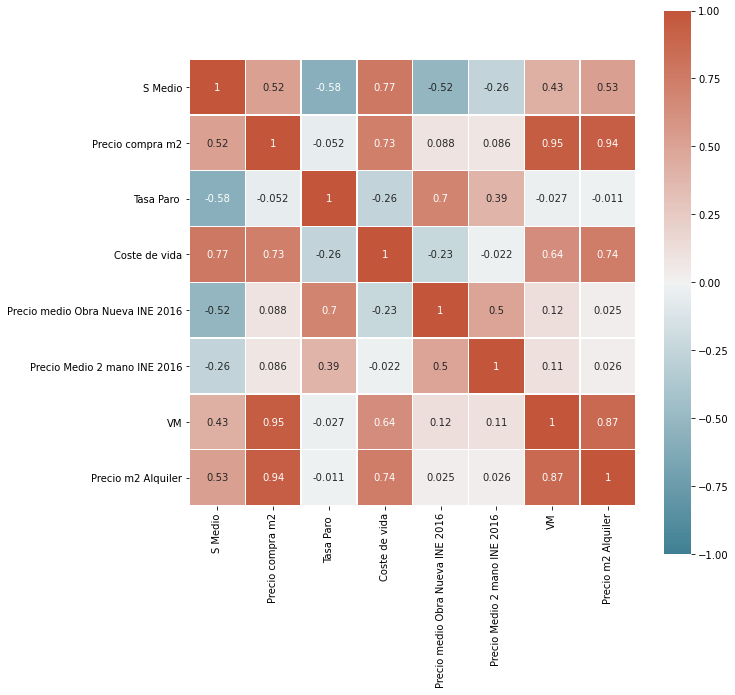

In [18]:
plt.figure(figsize=(10,10))
heat = sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            square=True, linewidths=.5, annot = True);
heat;

#### Primera conclusión
 Coste de vida tiene una alta correlación positiva con:
         el salario medio de cada provincia
         el precio de venta escriturado por provincia y precio m2 compra
         el valor de venta y precio de alquiler
         
  A su vez valor medio de compra escriturada tiene correlación positiva con precio de compra m2 y alquiler m2. No es perfecto dado que el m2 la fuente es idealista
         
  Tenemos otra correlación pero es descartable, dado que relaciona el aproa ctual con el precio vivienda de obra nueva  del 2016.

In [19]:
'''
Función para incorporar dentro de las figuras,
los valores al final de los barplot
Parametro obligatorio  la figura
Parametro opcional :H V en funcion de diagrama de barra horizontal o vertical
Parametro opcional: la separación
'''

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = float(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = float(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

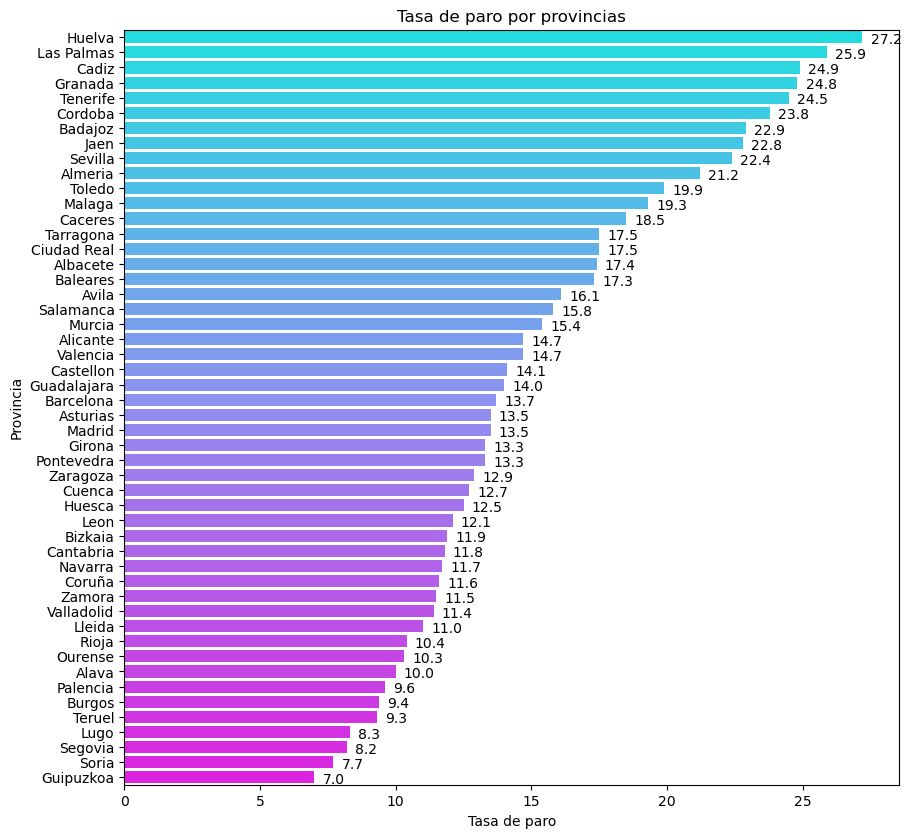

In [18]:
'''
-Devuelve tasaparo,
-argumento obligatorio dataframe con los datos generados en exploracion de datos
-argumentos opcional, start y stop, para seleccionar un conjunto concreto de provincias. Por defecto todo el conjunto.
-argumento opcional, orden, para organizar la salida en funcion de otra columna. Por defecto el propio paro
'''


def paro(df,start = None, stop = None, orden = 'Tasa Paro '):
    fysize = 10
    if start != None or stop != None:
        fysize = 5
    fig = plt.figure(figsize=(10,fysize), dpi = 100)
    ax = fig.gca() 
    tasaparo = sns.barplot(x = 'Tasa Paro ',
               y = 'provincias',
               ax = ax,
               palette = 'cool',
               data = df[:].sort_values(by = orden, ascending = False)[start:stop],
               ci = None)
    ax.set_ylabel("Provincia")
    ax.set_xlabel("Tasa de paro")
    ax.set_title("Tasa de paro por provincias")
    show_values_on_bars(tasaparo, "h", 0.3)
    return tasaparo;
paro(df);

In [20]:
dftp = df.sort_values(by = 'Tasa Paro ',  ascending = False)
'''
trace1 = go.Bar(y = dftp['Tasa Paro '],
               x = dftp['provincias'],
               name = 'citations',
               marker = dict(color = 'lifeExp',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = df['Tasa Paro '])
data = [trace1,]

layout = dict(title = 'Tamaño medio construido por provincia',
             xaxis= dict(title= 'Provincias',ticklen= 5))

fig = go.Figure(data = data, layout = layout)

iplot(fig)
'''

fig = go.Figure()

x=dftp['provincias']
y=dftp['Tasa Paro ']

fig.add_trace(go.Bar(x=x, y=y,
                     marker=dict(color = y,
                     colorscale='viridis')))

fig.show()

In [21]:
list(df.columns)

['provincias',
 'S Medio',
 'Precio compra m2',
 'Tasa Paro ',
 'Coste de vida',
 'Precio medio Obra Nueva INE 2016',
 'Precio Medio 2 mano INE 2016',
 'VM',
 'Precio m2 Alquiler']

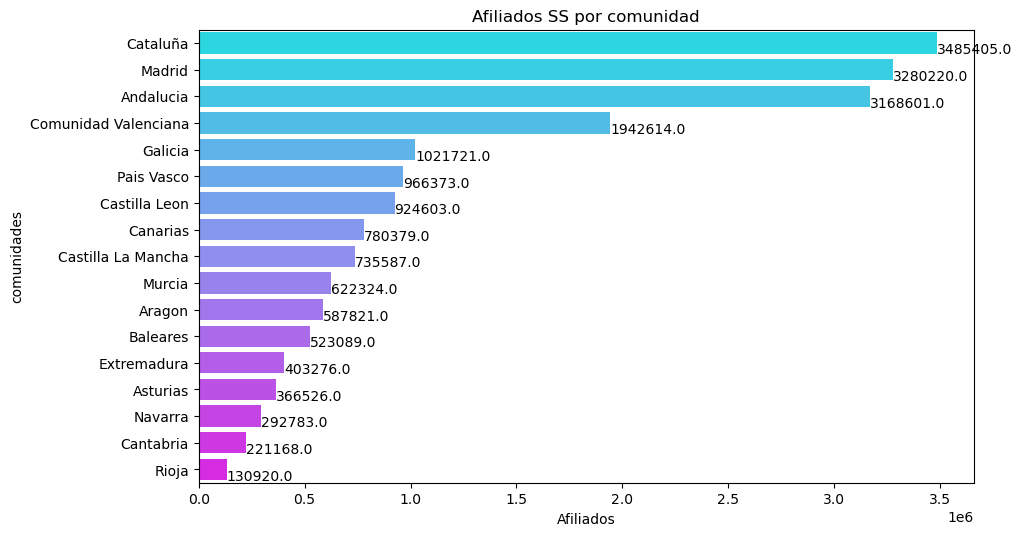

In [22]:
'''
-Devuelve afiliados,
-argumento obligatorio dataframe con los datos generados en exploracion de datos
-argumentos opcional, start y stop, para seleccionar un conjunto concreto de comunidades. Por defecto todo el conjunto.
-argumento opcional, orden, para organizar la salida en funcion de otra columna. Por defecto afiliados a la seguridad social
'''

def afiliados_SS(df,start = None, stop = None, orden = 'Afiliados SS'):
    fysize = 6
    if start != None or stop != None:
        fysize = 3
    fig = plt.figure(figsize=(10,fysize), dpi = 100)
    ax = fig.gca() 
    afiliados = sns.barplot(x = 'Afiliados SS',
               y = 'provincias',
               ax = ax,
               palette = 'cool',
               data = df[:].sort_values(by = orden, ascending = False)[start:stop],
               ci = None)
    ax.set_ylabel("comunidades")
    ax.set_xlabel("Afiliados")
    ax.set_title("Afiliados SS por comunidad")
    show_values_on_bars(afiliados, "h", 0.3)
    return afiliados;
afiliados_SS(comunidades);

In [23]:
dfss = comunidades.sort_values(by = 'Afiliados SS',  ascending = False)
fig = go.Figure()

x=dfss['provincias']
y=dfss['Afiliados SS']

fig.add_trace(go.Bar(x=x, y=y,
                     marker=dict(color = y,
                     colorscale='viridis')))

fig.show()

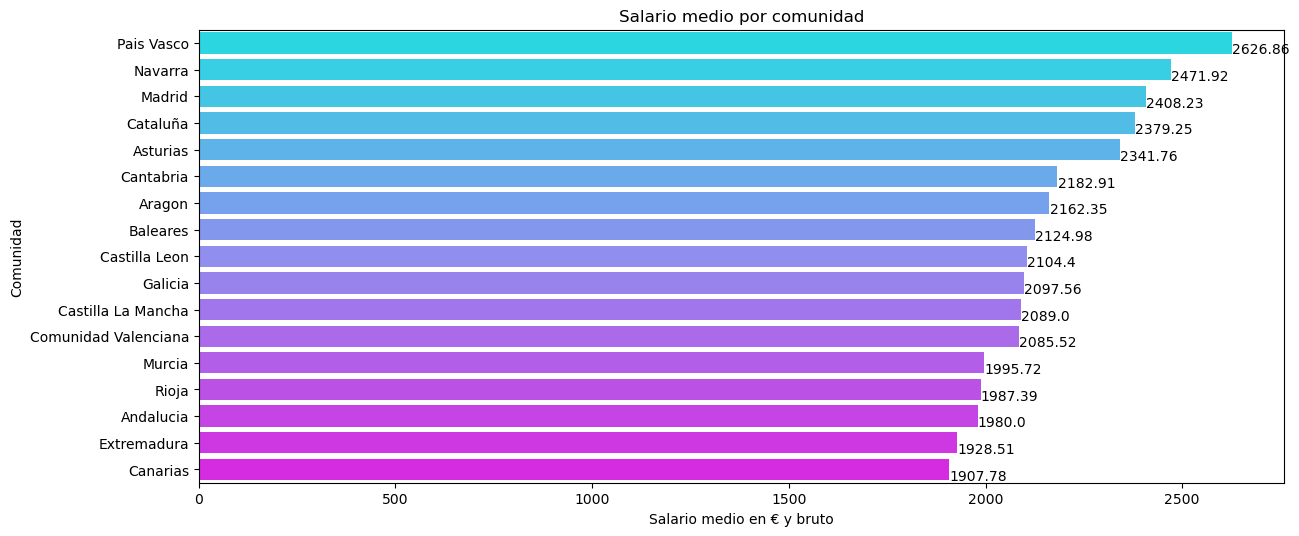

In [18]:
'''
-Devuelve compsalario, comparativa del salario medio por comunidad
-argumento obligatorio dataframe con los datos generados en exploracion de datos
-argumentos opcional, start y stop, para seleccionar un conjunto concreto de provincia. Por defecto todo el conjunto.
-argumento opcional, orden, para organizar la salida en funcion de otra columna. Por defecto el salario medio 
'''

def compararsalario(df,start = None, stop = None, orden = 'Salario Medio' ):
    fysize = 6
    if start != None or stop != None:
        fysize = 3
    fig = plt.figure(figsize=(14, fysize), dpi = 100)
    ax = fig.gca() 
    compsalario = sns.barplot(x = 'Salario Medio',
               y = 'provincias',
               ax = ax,
               palette = 'cool',
               data = df.sort_values(by = orden, ascending = False)[start:stop],
               ci = None)
    ax.set_ylabel("Comunidad")
    ax.set_xlabel("Salario medio en € y bruto")
    ax.set_title("Salario medio por comunidad")
    show_values_on_bars(compsalario, "h", 0.3)
    return compsalario;
compararsalario(comunidades);

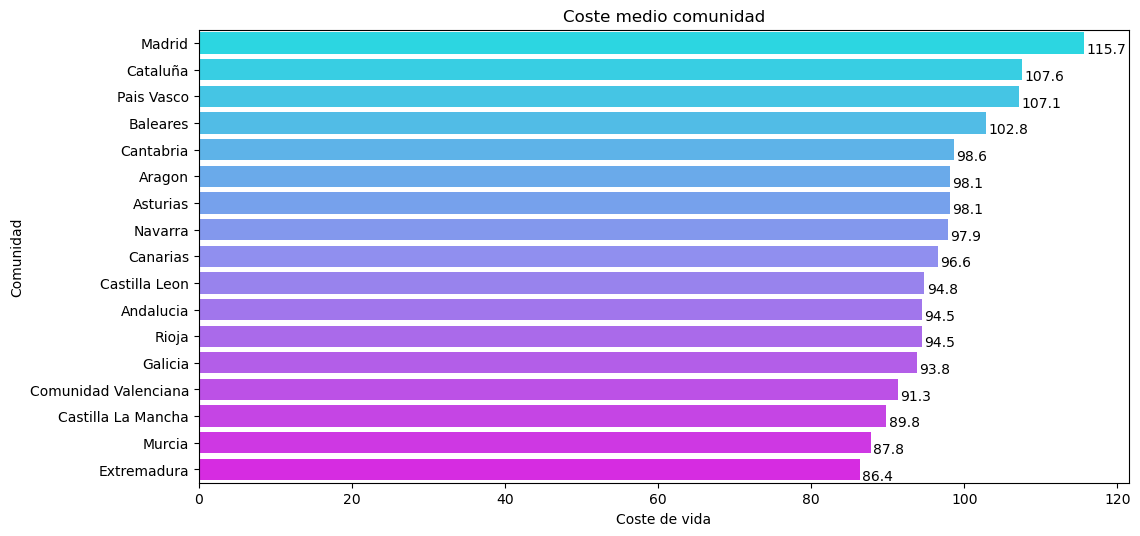

In [24]:
'''
-Devuelve compcoste, comparativa de los coste de vida
-argumento obligatorio dataframe con los datos generados en exploracion de datos
-argumentos opcional, start y stop, para seleccionar un conjunto concreto de provincia. Por defecto todo el conjunto.
-argumento opcional, orden, para organizar la salida en funcion de otra columna. Por defecto el coste de vida 
'''

def costevida(df,start = None, stop = None,orden = 'Coste de vida'):
    fysize = 6
    if start != None or stop != None:
        fysize = 3
    fig = plt.figure(figsize=(12,fysize), dpi = 100)
    ax = fig.gca() 
    compcoste = sns.barplot(x = 'Coste de vida',
               y = 'provincias',
               ax = ax,
               palette = 'cool',
               data = df.sort_values(by = orden, ascending = False)[start:stop],
               ci = None)
    ax.set_ylabel("Comunidad")
    ax.set_xlabel("Coste de vida")
    ax.set_title("Coste medio comunidad")
    show_values_on_bars(compcoste, "h", 0.3)
    return compcoste;
costevida(comunidades);

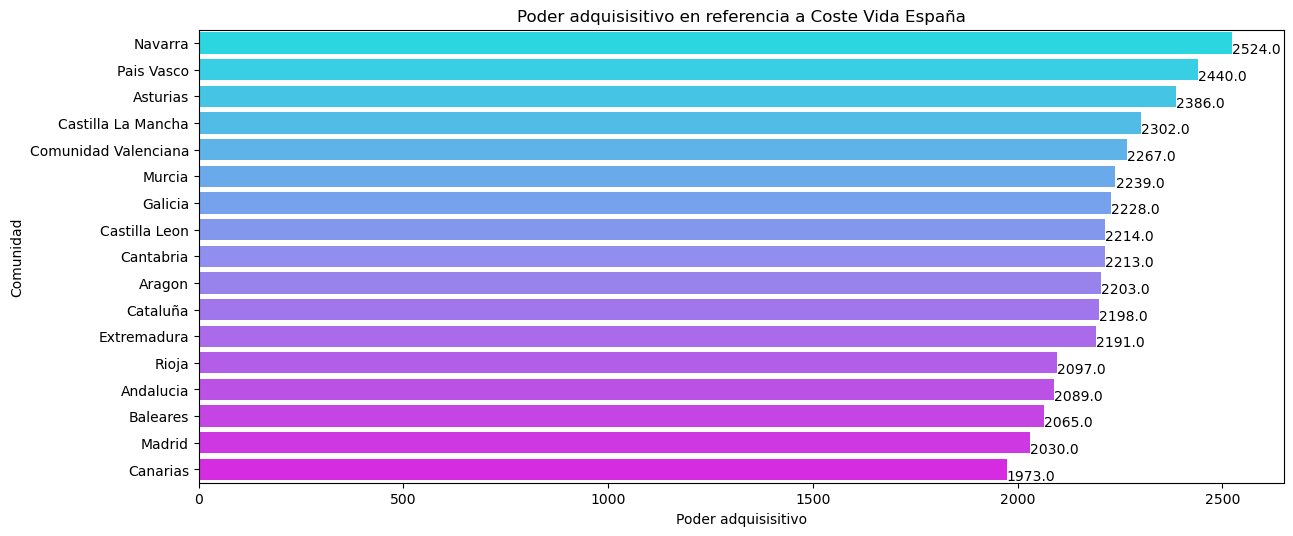

In [25]:
'''
-Devuelve poderad , equiparar salarios en base a la media española.
-argumento obligatorio dataframe con los datos generados en exploracion de datos
-argumentos opcional, start y stop, para seleccionar un conjunto concreto de provincia. Por defecto todo el conjunto.
-argumento opcional, orden, para organizar la salida en funcion de otra columna. Por defecto el salario medio 
'''
comunidades['poder adquisitivo'] = (((100 - comunidades['Coste de vida']) / 100) + 1) * comunidades['Salario Medio']
comunidades['poder adquisitivo'] = comunidades['poder adquisitivo'].round()

def poder_adquisitivo(df,start = None, stop = None, orden = 'poder adquisitivo' ):
    fysize = 6
    if start != None or stop != None:
        fysize = 3
    fig = plt.figure(figsize=(14, fysize), dpi = 100)
    ax = fig.gca() 
    poderad = sns.barplot(x = 'poder adquisitivo',
               y = 'provincias',
               ax = ax,
               palette = 'cool',
               data = df.sort_values(by = orden, ascending = False)[start:stop],
               ci = None)
    ax.set_ylabel("Comunidad")
    ax.set_xlabel("Poder adquisisitivo")
    ax.set_title("Poder adquisisitivo en referencia a Coste Vida España")
    show_values_on_bars(poderad , "h", 0.3)
    return poderad ;
poder_adquisitivo(comunidades);

In [26]:
def trabajas_vives(df, provincia_trabajas, provincia_vives):
    mask1 = df['provincias'] == provincia_trabajas
    mask2 = df['provincias'] == provincia_vives
    modificador  = ((df[mask1]['Coste de vida'].iloc[0] - df[mask2]['Coste de vida'].iloc[0]) / 100) + 1
    poder_adquisitivo = df[mask1]['S Medio'].iloc[0] * modificador
    return poder_adquisitivo

trabajas_vives(df, 'Murcia', 'Madrid')

    

1438.9141199999997

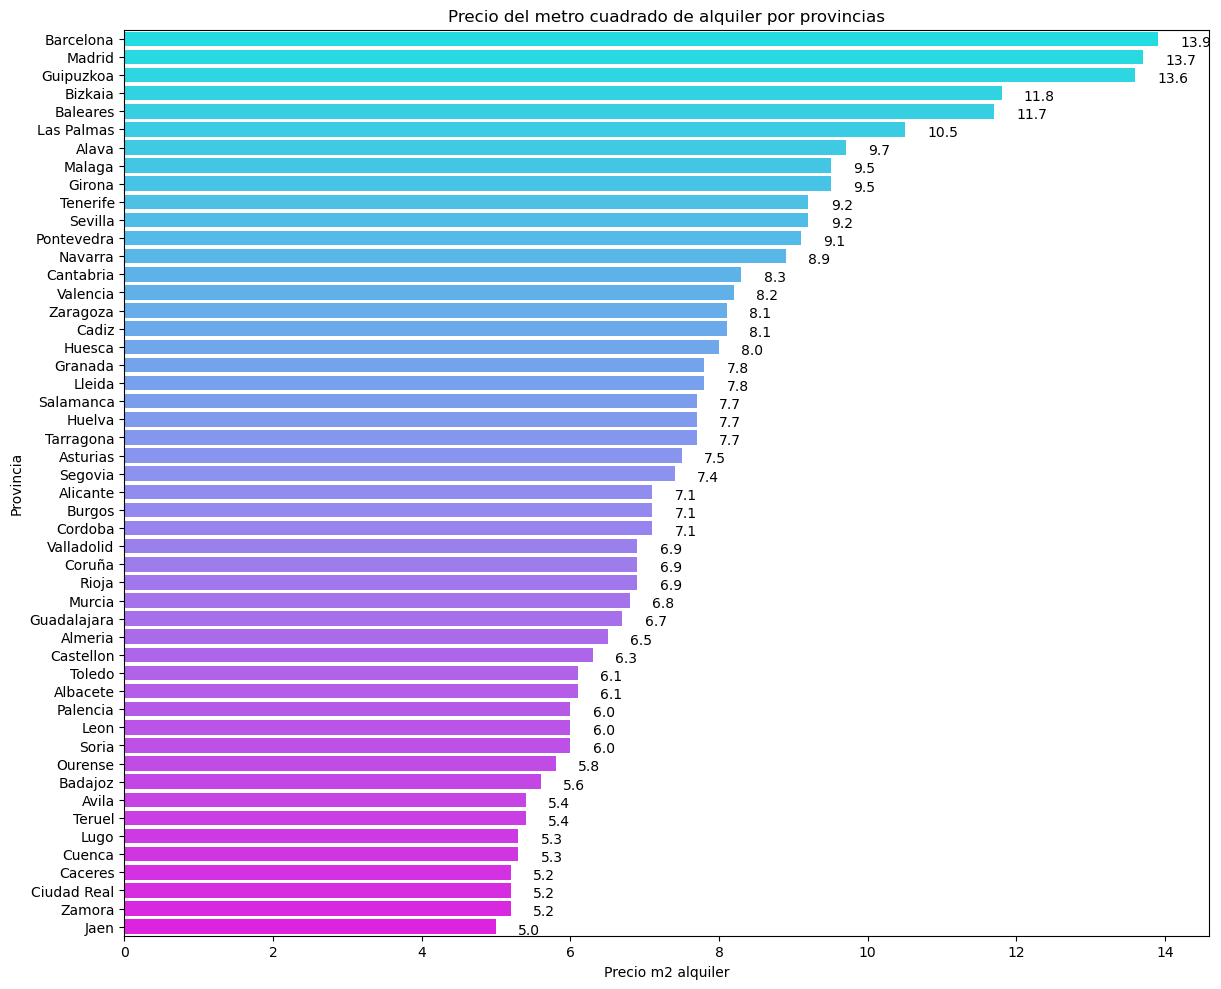

In [22]:
'''
-Devuelve compalquiler, comparativa en base al precio  del alquiler por m2 por provincia. 
-argumento obligatorio dataframe con los datos generados en exploracion de datos
-argumentos opcional, start y stop, para seleccionar un conjunto concreto de provincia. Por defecto todo el conjunto.
-argumento opcional, orden, para organizar la salida en funcion de otra columna. Por defecto  Precio m2 Alquiler
'''

def compararalquiler(df,start = None, stop = None, orden = 'Precio m2 Alquiler'):
    fysize = 12
    if start != None or stop != None:
        fysize = 5
    fig = plt.figure(figsize=(14,fysize), dpi = 100)
    ax = fig.gca() 
    compalquiler = sns.barplot(x = 'Precio m2 Alquiler',
               y = 'provincias',
               ax = ax,
               palette = 'cool',
               data = df.sort_values(by = orden, ascending = False)[start:stop],
               ci = None)
    ax.set_ylabel("Provincia")
    ax.set_xlabel("Precio m2 alquiler")
    ax.set_title("Precio del metro cuadrado de alquiler por provincias")
    show_values_on_bars(compalquiler, "h", 0.3)
    return compalquiler
compararalquiler(df);

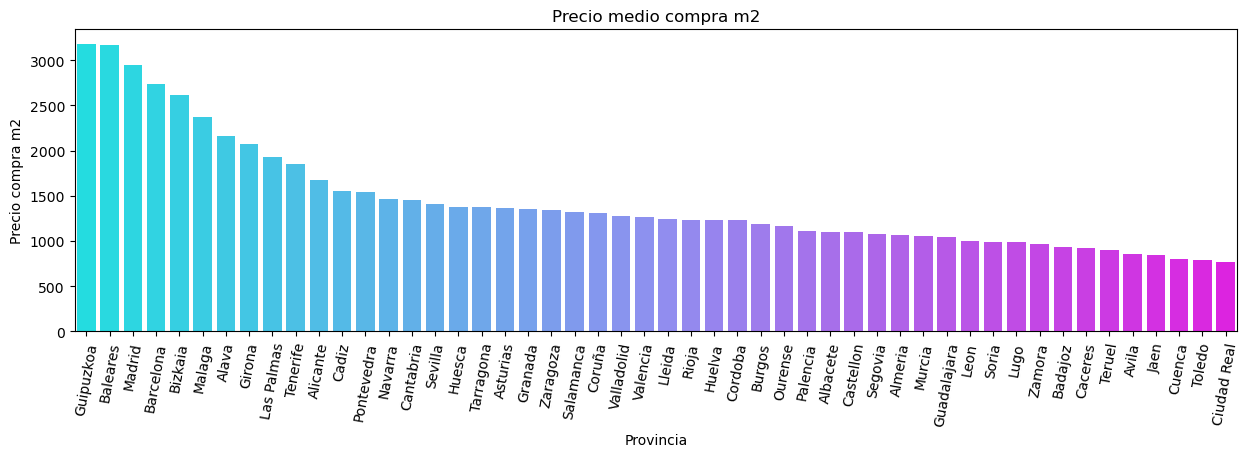

In [27]:
def compararcompram2(df,start = None, stop = None, orden = 'Precio compra m2'):
    fysize = 15
    if start != None or stop != None:
        fysize = 7
    fig = plt.figure(figsize=(fysize, 4), dpi = 100)
    ax = fig.gca() 
    compm2v = sns.barplot(x = 'provincias',
               y = 'Precio compra m2',
               ax = ax,
               palette = 'cool',
               data = df.sort_values(by = orden, ascending = False)[start:stop],
               ci = None)
    ax.set_ylabel("Precio compra m2")
    ax.set_xlabel("Provincia")
    ax.set_title("Precio medio compra m2")
    plt.xticks(rotation = 80)
    return compm2v;
compararcompram2(df);

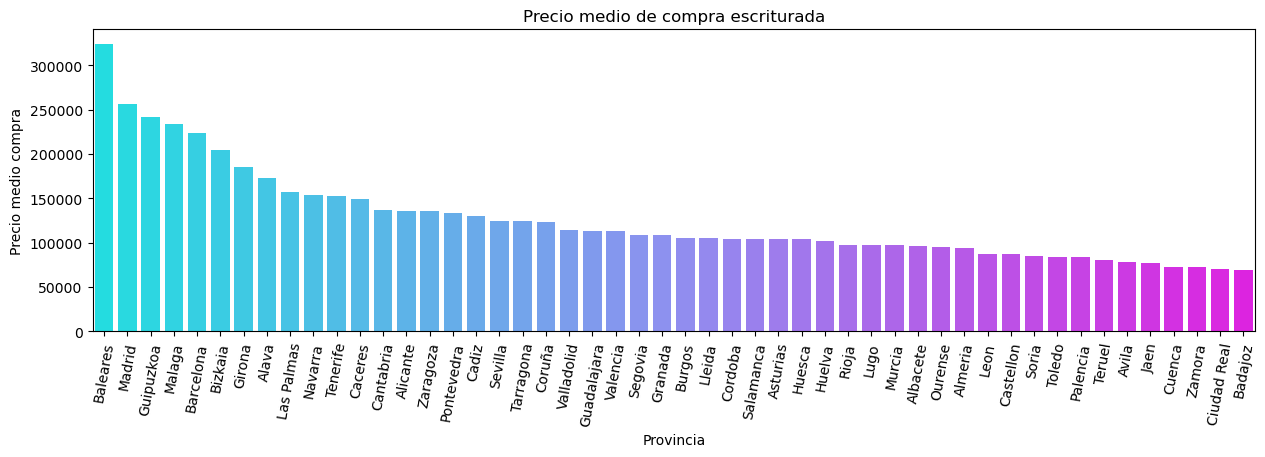

In [24]:
'''
-Devuelve compventas, comparativa del precio medio de compra escriturado
-argumento obligatorio dataframe con los datos generados en exploracion de datos
-argumentos opcional, start y stop, para seleccionar un conjunto concreto de provincia. Por defecto todo el conjunto.
-argumento opcional, orden, para organizar la salida en funcion de otra columna. Por defecto el VM
'''

def compararcompras(df,start = None, stop = None, orden = 'VM'):
    fysize = 15
    if start != None or stop != None:
        fysize = 7
    fig = plt.figure(figsize=(fysize, 4), dpi = 100)
    ax = fig.gca() 
    compventas = sns.barplot(x = 'provincias',
               y = 'VM',
               ax = ax,
               palette = 'cool',
               data = df.sort_values(by = orden, ascending = False)[start:stop],
               ci = None)
    ax.set_ylabel("Precio medio compra")
    ax.set_xlabel("Provincia")
    ax.set_title("Precio medio de compra escriturada")
    plt.xticks(rotation = 80)
    return compventas;
compararcompras(df);

In [28]:
#Tamaño medio vivienda escriturada
df['Tamaño medio construido'] = (df['VM'] / df['Precio compra m2']).astype(int)
df.head()


,provincias,S Medio,Precio compra m2,Tasa Paro,Coste de vida,Precio medio Obra Nueva INE 2016,Precio Medio 2 mano INE 2016,VM,Precio m2 Alquiler,Tamaño medio construido
0,Madrid,2408.23,2945.0,13.5,115.7,79097.0,64674.0,256030.20,13.7,86
1,Murcia,1995.72,1056.0,15.4,87.8,82108.0,6684.0,96970.65,6.8,91
2,Asturias,2341.76,1361.0,13.5,98.1,79552.0,63398.0,103938.28,7.5,76
3,Rioja,1987.39,1235.0,10.4,94.5,64394.0,56758.0,97816.94,6.9,79
4,Cantabria,2182.91,1454.0,11.8,98.6,76523.0,61731.0,137389.44,8.3,94


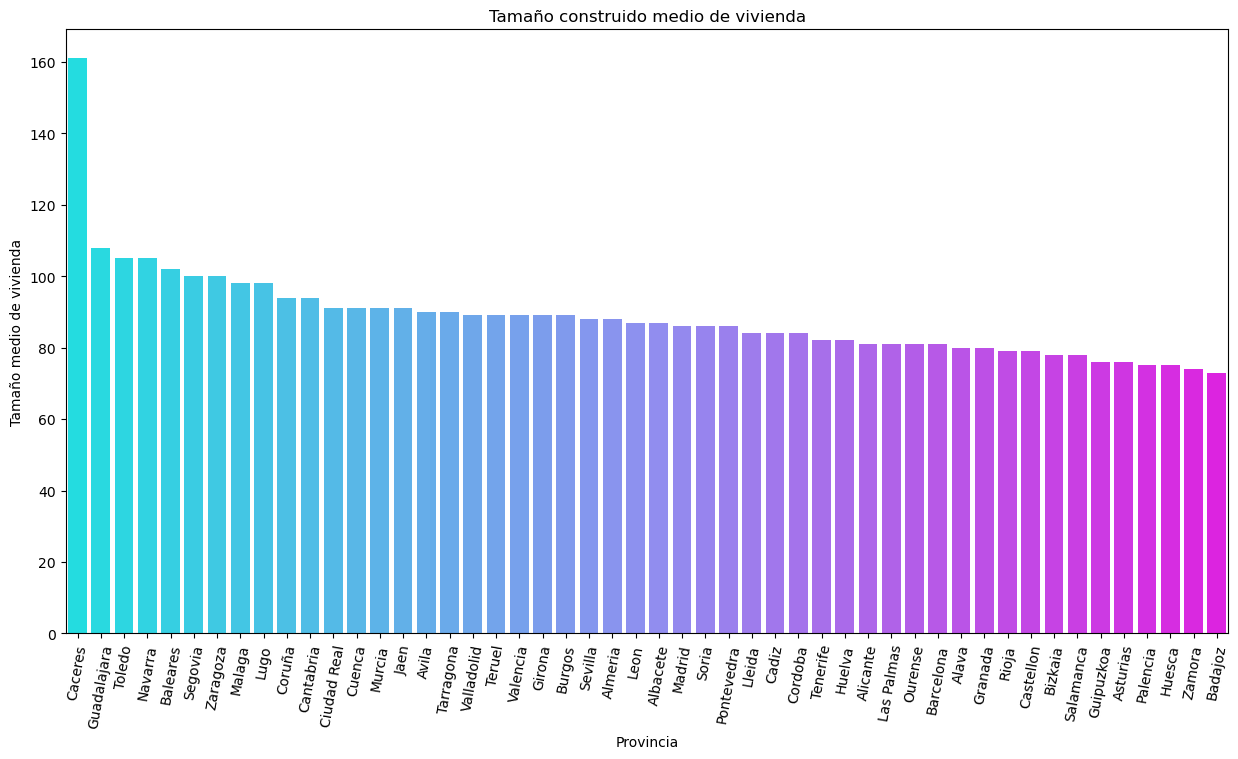

In [44]:
'''
-Devuelve compventas, comparativa del precio medio de compra escriturado
-argumento obligatorio dataframe con los datos generados en exploracion de datos
-argumentos opcional, start y stop, para seleccionar un conjunto concreto de provincia. Por defecto todo el conjunto.
-argumento opcional, orden, para organizar la salida en funcion de otra columna. Por defecto el VM
'''

def comparartam(df,start = None, stop = None, orden = 'Tamaño medio construido'):
    fysize = 15
    if start != None or stop != None:
        fysize = 7
    fig = plt.figure(figsize=(fysize, 8), dpi = 100)
    ax = fig.gca() 
    comptam = sns.barplot(x = 'provincias',
               y = 'Tamaño medio construido',
               ax = ax,
               palette = 'cool',
               data = df.sort_values(by = orden, ascending = False)[start:stop],
               ci = None)
    ax.set_ylabel("Tamaño medio de vivienda")
    ax.set_xlabel("Provincia")
    ax.set_title("Tamaño construido medio de vivienda")
    plt.xticks(rotation = 80)
    return comptam;
comparartam(df);

In [29]:
import plotly.graph_objs as go
# Creating trace1
trace1 = go.Scatter(
                    x = df['provincias'],
                    y = df['Tamaño medio construido'],
                    name = 'Tamaño medio construido',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = df['Tamaño medio construido'])
data = [trace1]

layout = dict(title = 'Tamaño medio construido por provincia',
             xaxis= dict(title= 'Provincias',ticklen= 5)
           )
fig = go.Figure(data = data, layout=layout)
iplot(fig)

#### Funciones iniciales de visionado
* compararalquiler
* compararcompras
* compararsalario
* costevida
* paro

In [30]:
reversed_alquiler = alquiler.iloc[::-1]
reversed_alquiler.head()

provincias,Meses,Madrid,Murcia,Asturias,Rioja,Cantabria,Navarra,Baleares,Almeria,Cadiz,...,Valencia,Alava,Guipuzkoa,Bizkaia,Badajoz,Caceres,Coruña,Lugo,Ourense,Pontevedra
118,agosto 2011,11.0,5.6,7.1,5.7,7.0,7.3,8.5,5.3,6.9,...,5.8,8.8,10.8,11.4,5.1,4.6,5.9,5.2,4.9,7.1
117,septiembre 2011,11.0,5.5,6.9,5.8,7.0,7.4,8.4,5.3,7.0,...,5.8,8.5,10.9,11.5,5.0,4.7,5.8,5.2,4.8,7.0
116,octubre 2011,11.1,5.6,6.8,5.7,7.0,7.3,8.3,5.3,6.8,...,5.8,8.6,11.1,11.5,4.9,4.7,5.8,5.0,4.9,7.0
115,noviembre 2011,10.9,5.7,6.8,5.8,7.0,7.3,8.2,5.3,6.8,...,5.8,8.5,11.2,11.5,4.8,4.7,5.8,4.9,4.9,6.9
114,diciembre 2011,10.8,5.6,6.8,5.9,7.0,7.3,8.2,5.2,6.6,...,5.8,8.7,11.2,11.6,4.9,4.7,5.8,4.8,4.9,6.9


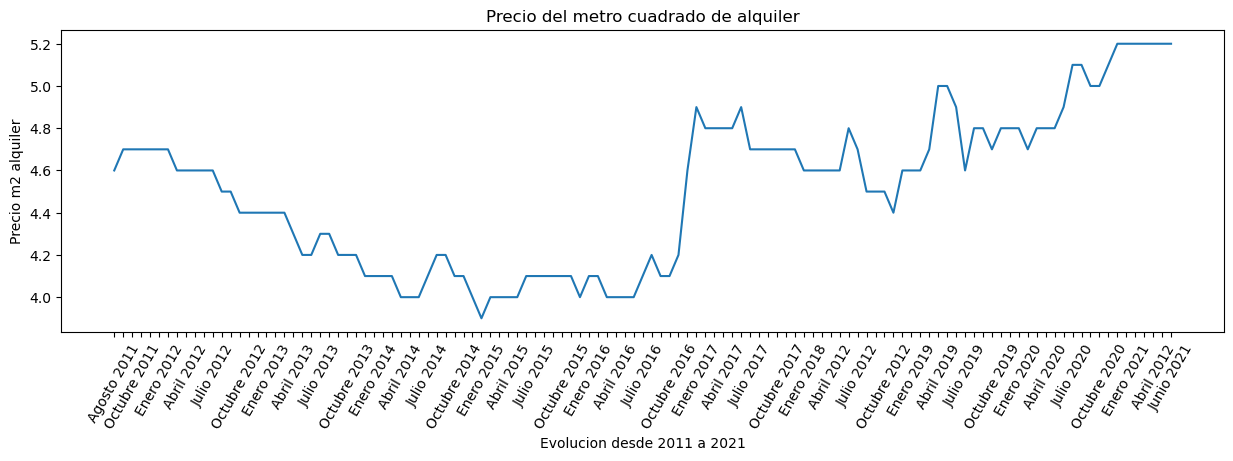

In [61]:
def alquilerprovincia(df, provincia):
    listalabel = ['Agosto 2011','','Octubre 2011','','',
                  'Enero 2012','','','Abril 2012','','','Julio 2012','','','Octubre 2012','','',
                 'Enero 2013','','','Abril 2013','','','Julio 2013','','','Octubre 2013','','',
                 'Enero 2014','','','Abril 2014','','','Julio 2014','','','Octubre 2014','','',
                 'Enero 2015','','','Abril 2015','','','Julio 2015','','','Octubre 2015','','',
                 'Enero 2016','','','Abril 2016','','','Julio 2016','','','Octubre 2016','','',
                 'Enero 2017','','','Abril 2017','','','Julio 2017','','','Octubre 2017','','',
                 'Enero 2018','','','Abril 2012','','','Julio 2012','','','Octubre 2012','','',
                 'Enero 2019','','','Abril 2019','','','Julio 2019','','','Octubre 2019','','',
                 'Enero 2020','','','Abril 2020','','','Julio 2020','','','Octubre 2020','','',
                 'Enero 2021','','','Abril 2012','','Junio 2021']

    fig = plt.figure(figsize=(15,4), dpi = 100)
    ax = fig.gca()
    alquiler_madrid = sns.lineplot(data=df, x="Meses", y=provincia,)
    ax.set_ylabel("Precio m2 alquiler")
    ax.set_xlabel("Evolucion desde 2011 a 2021")
    ax.set_title("Precio del metro cuadrado de alquiler")
    alquiler_madrid.set(xticklabels=listalabel)
    plt.xticks(rotation = 60);
alquilerprovincia(reversed_alquiler,'Caceres' );

In [31]:
trace1 = go.Scatter(
                    x = reversed_alquiler['Meses'],
                    y = reversed_alquiler['Madrid'],
                    name = 'Salario Medio unidad 10',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = reversed_alquiler['Madrid'])
data = [trace1,]

layout = dict(title = 'Datos grupales provincias',
             xaxis= dict(title= 'Provincias',ticklen= 5)
           )
fig = go.Figure(data = data, layout=layout)
iplot(fig)

In [32]:
comunidades.iloc[0]['provincias']
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [33]:
import plotly.graph_objs as go
# Creating trace1
trace1 = go.Scatter(
                    x = df['provincias'],
                    y = df['S Medio']/100,
                    name = 'Salario Medio unidad 10',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = df['S Medio'])
# Creating trace2
trace2 = go.Scatter(
                    x = df['provincias'],
                    y = df['Coste de vida']-100,
                    name = 'Coste de vida',
                    mode= 'lines',
                    marker = dict(color = 'rgb(252, 154, 7)'),
                    text = df['Coste de vida'])

data = [trace1, trace2]

layout = dict(title = 'Datos grupales provincias',
             xaxis= dict(title= 'Provincias',ticklen= 5)
           )
fig = go.Figure(data = data, layout=layout)
iplot(fig)

In [34]:
# Creating trace4
trace4 = go.Scatter(
                    x = df['provincias'],
                    y = df['Precio m2 Alquiler'],
                    name = 'Precio m2 Alquiler',
                    mode= 'lines',
                    marker = dict(color = 'rgb(252, 154, 7)'),
                    text = df['Precio m2 Alquiler'])
# Creating trace5
trace5 = go.Scatter(
                    x = df['provincias'],
                    y = df['VM']/10000,
                    name = 'Precio de venta medio, unidad 10^4',
                    mode= 'lines',
                    marker = dict(color = 'rgba(63, 121, 191, 0.8)'),
                    text = df['VM'])
# Creating trace6
trace6 = go.Scatter(
                    x = df['provincias'],
                    y = df['Precio compra m2']/100,
                    name = 'Precio de venta m2, unidad 10^2',
                    mode= 'lines',
                    marker = dict(color = 'rgb(0, 188, 9)'),
                    text = df['Precio compra m2'])
data = [trace4, trace5, trace6]

layout = dict(title = 'Alquiler & Compra',
             xaxis= dict(title= 'Provincias',ticklen= 5)
           )
fig = go.Figure(data = data, layout=layout)
iplot(fig)